# **Telegram news groups data analysis**

- Author: Muhanned Shaheen



# **Project Overview**
- The project involves activating a Python Telegram Scraper to extract as much data as possible from selected Telegram channels (@RamallahNews,@FajrNews,@Almostashaar,@Meshheek)  during the timeframe from September 20 to September 30, 2024. In addition to data extraction, an analysis will be conducted to evaluate the number of posts per channel and assess engagement metrics, with a focus on identifying the most engaging channel based on the chosen KPIs.

# ***Importing and loading the data***





In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from matplotlib.ticker import FuncFormatter
import re

In [ ]:
#Loading the data from google drive
fpath="/content/drive/MyDrive/Social Studio/1'st Interview - Assignment /FINAL_TG10_days_data_Analysis_with_05418.xlsx"
df=pd.read_excel(fpath)
#previewing first 5 rows
df.head()

,Type,Group,Author ID,Content,Date,Message ID,Author,Views,Reactions,Shares,Media,Url,Comments List
0,text,@meshheek,-1001200257707,**اذا دخلتم إلى ارضنا\nفرقكم ستدمر\nألويتكم ست...,2024-09-30 21:39:32,51249,NaN,99053,❤ 1002 🫡 197 👍 78 🔥 71 😢 21,147,True,https://t.me/meshheek/51249,[]
1,text,@meshheek,-1001200257707,**في أول هجوم على استعدادات الدخول البري\n\nحز...,2024-09-30 21:33:36,51248,NaN,96296,❤ 653 🔥 137 🫡 61 👍 33,46,False,https://t.me/meshheek/51248,[]
2,text,@meshheek,-1001200257707,يا هلا ومرحب\n\nرد السيد على تهديدات دخول العد...,2024-09-30 21:30:04,51247,NaN,95440,❤ 710 🔥 144 🫡 79 👍 44 😢 15,122,True,https://t.me/meshheek/51247,[]
3,text,@meshheek,-1001200257707,NaN,2024-09-30 21:08:42,51246,NaN,95980,🤬 491 👍 49 🔥 19 😢 16 🫡 12,8,True,https://t.me/meshheek/51246,[]
4,text,@meshheek,-1001200257707,**استمرار الاشتباكات بين المقاومة وسلطة الجواس...,2024-09-30 20:54:11,51245,NaN,90710,🔥 601 🤬 190 👍 30 ❤ 24 😢 6,29,True,https://t.me/meshheek/51245,[]


# ***Exploring and cleaning the data***

In [ ]:
#Display data frame information
print(df.info())
print('\n')

#Print the number of null values
print(f'- Number Of Null values is : {df.isna().sum().sum()}')

#Print the number of dublicated values
print(f'- Number Of Dublicated Values: {df.duplicated().sum()}')

#Print the shape of the dataset
print(f'- Shape of the data: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5418 entries, 0 to 5417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           5418 non-null   object
 1   Group          5418 non-null   object
 2   Author ID      5418 non-null   int64 
 3   Content        4860 non-null   object
 4   Date           5418 non-null   object
 5   Message ID     5418 non-null   int64 
 6   Author         1555 non-null   object
 7   Views          5418 non-null   int64 
 8   Reactions      4868 non-null   object
 9   Shares         5418 non-null   int64 
 10  Media          5418 non-null   bool  
 11  Url            5418 non-null   object
 12  Comments List  5418 non-null   object
dtypes: bool(1), int64(4), object(8)
memory usage: 513.4+ KB
None


- Number Of Null values is : 4971
- Number Of Dublicated Values: 0
- Shape of the data: (5418, 13)


- the number of null values is 4971 which, representing ~92% of the data. This is a very high propation that needs to be further explored

****Data Types****

- Integer:`4`
- Object:`8`
- Bool: `1`



## Exploring the null values

In [ ]:
# Storing columns that contain null values
null_cols=df.columns[df.isna().any()]

#display the number of null values in each column that contain null values
for column in null_cols:
    null_count=df[column].isna().sum()
    print(f"Number of null values in column '{column}': {null_count}")

Number of null values in column 'Content': 558
Number of null values in column 'Author': 3863
Number of null values in column 'Reactions': 550


### Content feature null values exploration
  


In [ ]:
null_content=df[df['Content'].isna()]

#Count the number of rows where Media is True in the null content rows
media_count=null_content[null_content['Media']==True].shape[0]


# Display the results
print(f"Total null values in 'Content' feature: {null_content.shape[0]}")
print(f"Number of null content rows where media is True: {media_count}")

Total null values in 'Content' feature: 558
Number of null content rows where media is True: 558


- The Content feature has 558 null values , representing ~10 % of the data set. after exploring whether it's a media or a text data type , we found that all the missing content representing a media data type but without content. Therefore, missing values in will be handled by filling them with 'Media only' to indicate it's a media without text, since dropping it will affect the engagement channels analysis.

In [ ]:
#Fill null values in Content with 'Media only'
df['Content'].fillna('Media only',inplace=True)

### Author feature null values exploration

-  By selecting the needed features that will be used in our analysis, Author column will be droped. The Author column has 3865 null values , representing 77% of the data . rendering it quasi-constant. Its high rate of missing data means it provides no significant insights and does not influence the report Therefore, removing it from the dataset is advisable to enhance analysis quality and focus on more relevant features.

In [ ]:
#Droping Author feature
df.drop(columns='Author',inplace=True)

### Reactions null values exploration
  

- The Reactions feature has 558 null values, representing ~10 % of the data set.
  missing values will be handled through filling them with 'no reaction', since dropping it will affect the engagement channels analysis, as there pieces of content has no reaction.

In [ ]:
df['Reactions'].fillna('No Reactions',inplace=True)

In [ ]:
#Final null values checking
df.isna().sum().sum()

0

## inconsistent and inappropriate  categories

In [ ]:
#Finding inconsistent categories of data
cat_columns=df.select_dtypes(object).columns
for col in cat_columns:
  print(f'Value For {col} column is: ')
  print(df[col].value_counts())
  print('\n')

Value For Type column is: 
Type
text    5418
Name: count, dtype: int64


Value For Group column is: 
Group
@fajernews       2566
@ramallahnew     1555
@Almustashaar     934
@meshheek         363
Name: count, dtype: int64


Value For Content column is: 
Content
Media only                                                                                                                                                                                                                                                                                                                                                                                                                558
أسعار صرف العملات                                                                                                                                                                                                                                                                                                                    

- There are no inconsistent values , but the group names will be adjusted for future analysis and insights.

In [ ]:
#Replace Group column values with the appropriate values
df['Group']=df['Group'].replace({'@fajernews': 'Fajer news',
                                   '@ramallahnew': 'Ramallah news',
                                   '@Almustashaar': 'Almustashaar',
                                   '@meshheek': 'meshheek'})



## Checking impossible values

In [ ]:
# Display the summary statistics
print(f"Summary Statistics for Numerical Columns: \n {df.describe().round(2)}")

Summary Statistics for Numerical Columns: 
           Author ID  Message ID      Views   Shares
count  5.418000e+03     5418.00    5418.00  5418.00
mean  -1.001323e+12    97686.95   42377.59     6.93
std    1.003547e+08    35310.02   45774.29    23.98
min   -1.001476e+12    41825.00    7111.00     0.00
25%   -1.001476e+12    85556.25   14297.25     0.00
50%   -1.001253e+12    86919.50   20415.00     1.00
75%   -1.001253e+12   131251.75   36297.75     3.00
max   -1.001200e+12   132632.00  226978.00   608.00


- There are no impossible value.

-

# ***Stakeholder Questions***

- Since data in contains rows represent different points in time ,it is considered time series data.

In [ ]:
#Convert Date column into datetime dataype
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#Set date column as the index
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Type,Group,Author ID,Content,Message ID,Views,Reactions,Shares,Media,Url,Comments List
Date,,,,,,,,,,,
2024-09-30 21:39:32,text,meshheek,-1001200257707,**اذا دخلتم إلى ارضنا\nفرقكم ستدمر\nألويتكم ست...,51249,99053,❤ 1002 🫡 197 👍 78 🔥 71 😢 21,147,True,https://t.me/meshheek/51249,[]
2024-09-30 21:33:36,text,meshheek,-1001200257707,**في أول هجوم على استعدادات الدخول البري\n\nحز...,51248,96296,❤ 653 🔥 137 🫡 61 👍 33,46,False,https://t.me/meshheek/51248,[]
2024-09-30 21:30:04,text,meshheek,-1001200257707,يا هلا ومرحب\n\nرد السيد على تهديدات دخول العد...,51247,95440,❤ 710 🔥 144 🫡 79 👍 44 😢 15,122,True,https://t.me/meshheek/51247,[]
2024-09-30 21:08:42,text,meshheek,-1001200257707,Media only,51246,95980,🤬 491 👍 49 🔥 19 😢 16 🫡 12,8,True,https://t.me/meshheek/51246,[]
2024-09-30 20:54:11,text,meshheek,-1001200257707,**استمرار الاشتباكات بين المقاومة وسلطة الجواس...,51245,90710,🔥 601 🤬 190 👍 30 ❤ 24 😢 6,29,True,https://t.me/meshheek/51245,[]


## Q1) Number of posts per channel

In [ ]:
#Inspect the number of crimes
posts_counts_bar=df['Group'].value_counts().to_frame('Total # of posts')


In [ ]:
#Display with an inline-barplot inside your df
posts_counts_bar.style.bar('Total # of posts')

,Total # of posts
Group,
Fajer news,2566
Ramallah news,1555
Almustashaar,934
meshheek,363


- Configuration of visualization settings

In [ ]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [ ]:
#Storing the count of posts for each group
posts_count=df['Group'].value_counts()

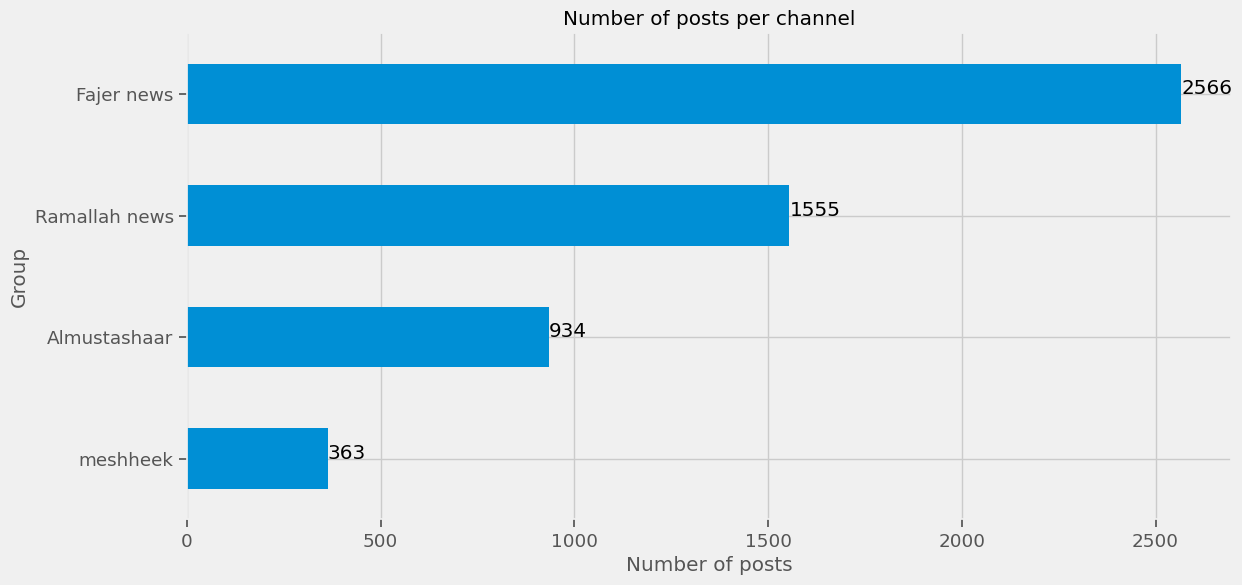

In [ ]:
#Plotting horizontal bar graph
ax = posts_count.sort_values().plot(kind='barh',figsize=(12,6))
ax.set(title='Number of posts per channel',xlabel='Number of posts');

#Adding value labels to the bars
for index, value in enumerate(posts_count.sort_values()):
    ax.text(value, index, str(value), fontsize=12 * 1.2)  # Add value to the right of the bar

plt.show()

- The figure illsturate that the highest telegram channel posts count from the selected channels,in the period  from Sep 20 to Sep 30 is from 'Fajer news'  with 2566 posts, followed by 'Ramallah news' with 1555 posts, while the lowest posts count is from 'meshheek telegram channel' with 363 posts.

- **After further investigation we found the follow:**


  
  - **Fajer news:**
          - Instagram : 618K followers.
          - Facebook: 2M followers.
          - Telegram: 223K Subscribers
          - Official TV channel.


  - **Ramallah news:**
          - Instagram : 31.8K followers.
          - Facebook: 3.2M followers.
          - Telegram: 264K Subscribers


  - **Almustashaar:**
          - Instagram : 30.9K followers.
          - Facebook: no offical page.
          - Telegram: 788K Subscribers
      
  - **Meshheek:**
          - Instagram : 39K followers.
          - Facebook: 9K followers.
          - Telegram: 476K Subscribers







So there are insights indicating a relationship between number of the subscribers and posts which may affect on channels' engagement. Engagement will be explored further in the project.




## Q2) Choose any of the engagement KPIs to show the most engaging channel according to the chosen KPIs

**For this stackholder question , i will apply two KPI:**


 **1- Number of interaction per post :** This includes like, comments, views, and shares.

  **2-Engagement Rate:**  The ratio of the number of interactions(likes, comments, shares, views) to the number of followers.



### 1- Number of interaction per post:

In [ ]:
# Function to extract numbers from the string and sum them
def extract_numbers(reaction_str):
    numbers = re.findall(r'\d+', reaction_str)
    return sum(map(int, numbers))



#Adding new int type column for total reactions
df['Reactions_count'] = df['Reactions'].apply(extract_numbers)

#Adding new column for total comments
df['Comments Count'] = df['Comments List'].apply(len)

#Adding new column for total Interactions
df['Total Interactions']=df['Reactions_count']+df['Shares']+df['Comments Count']+df['Views']

#Interaction summation for each group
group_interactions = df.groupby('Group')['Total Interactions'].sum().reset_index()

In [ ]:
group_interactions.sort_values(by='Total Interactions',ascending=False)

,Group,Total Interactions
0,Almustashaar,124585767
1,Fajer news,39726298
2,Ramallah news,35939450
3,meshheek,30572961


In [ ]:
#Change numbers display format
def format_interactions(num,pos=None):
    if num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return str(num)

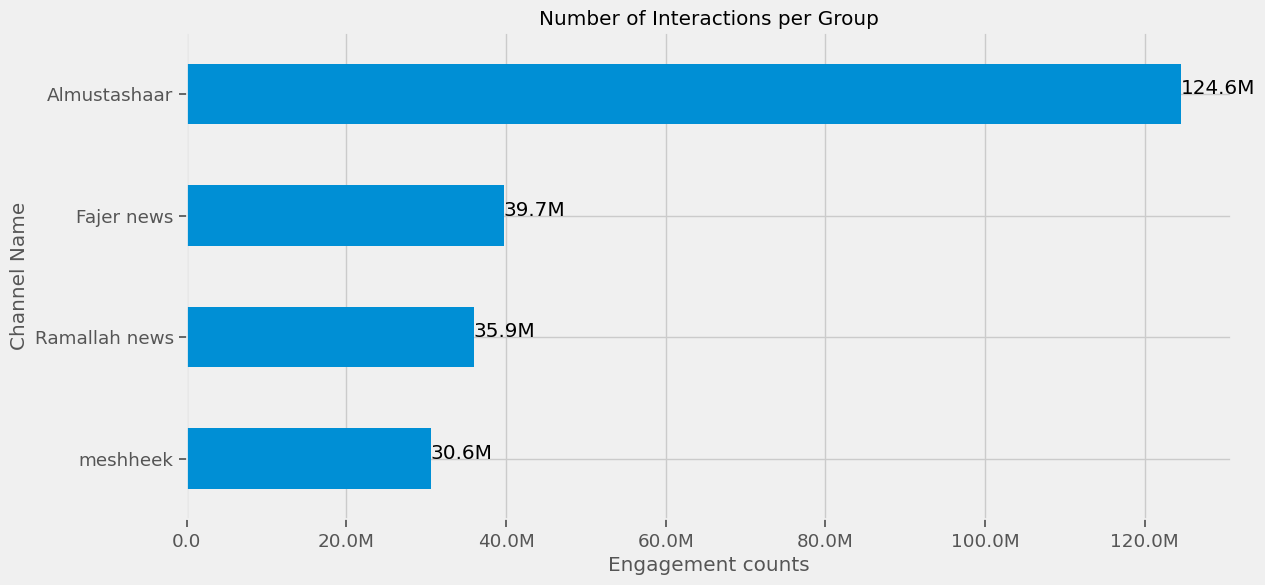

In [ ]:
#Plotting horizontal bar graph for total ineteraction per Group
ax=group_interactions.sort_values(by='Total Interactions').plot(kind='barh',x='Group', y='Total Interactions', legend=False, figsize=(12, 6))
ax.set(title='Number of Interactions per Group',xlabel='Engagement counts',ylabel='Channel Name');

#Change x-axis format using major_formatter
ax.xaxis.set_major_formatter(FuncFormatter(format_interactions))

#Adding value labels to the bars
for index, value in enumerate(group_interactions.sort_values(by='Total Interactions')['Total Interactions']):
    formatted_value = format_interactions(value)
    ax.text(value, index, formatted_value, fontsize=12 * 1.2)




plt.show()

- The figure illustrates that 'Almustashaar' channel has the largest number of engagement among the selected channels  with 124.6 million over the 10-day period, followed by 'Fajer news' with 39.7 million engagements , on the other hand, 'meshheek' has the lowest engagement count with 30.6 million.




- **For now we conclude the following**:


 - **Almustashar:**
      - Engagement: The highest 124.6 million engagement over a 10-day period.

      - Posts: Posted 943 times over the 10-day period.

      - subscribers: Largest number of Telegram subscribers, totaling 788k.


  - **Fajr News:**
      - Engagement: Engagement count of 39.7 million.

      - Posts: Lowest number of subscribers among the selected channels, with 223k.

      - subscribers: Most active with 2566 posts over the 10-day period.


  - **Ramallah News:**

      - Engagement: Engagement count of 35.9 million.
      
      - Posts: number of subscribers is 264k.

      - subscribers: Ranks seconed active with 1555 posts over the 10-day period.


  - **Meshheek:**

    - Engagement: Lowest engagement count at 30.6 million.
    - Posts: Ranks second in subscriber count with 476k subscribers.
    - subscribers: Fewest posts, totaling 353 over the 10-day period.


### 2- Engagement rate

- Engagement rates are crucial metrics for assessing the performance of channels on social media to show the most engaging channel .

- Engagement Rate = (Total Engagements / Total Subscribers) × 100



In [ ]:
#Finding Engagement Rate  for 'Almustashaar' channel
engagement_rate_Almustashaar=(df[df['Group']=='Almustashaar']['Total Interactions'].sum() / 789663 )*100
engagement_rate_Fajer_news=(df[df['Group']=='Fajer news']['Total Interactions'].sum() / 223182 )*100
engagement_rate_Ramallah_news=(df[df['Group']=='Ramallah news']['Total Interactions'].sum() / 264181)*100
engagement_rate_meshheek_news=(df[df['Group']=='meshheek']['Total Interactions'].sum() / 476738)*100


In [ ]:
#Create DataFrame of the engaement values
group_engagement_rate= pd.DataFrame({'Group':['Almustashaar','Fajer news','Ramallah news','meshheek'],
                                    'Total':[engagement_rate_Almustashaar,engagement_rate_Fajer_news,engagement_rate_Ramallah_news,engagement_rate_meshheek_news]})

group_engagement_rate

,Group,Total
0,Almustashaar,15777.080476
1,Fajer news,17799.956090
2,Ramallah news,13604.100976
3,meshheek,6412.948202


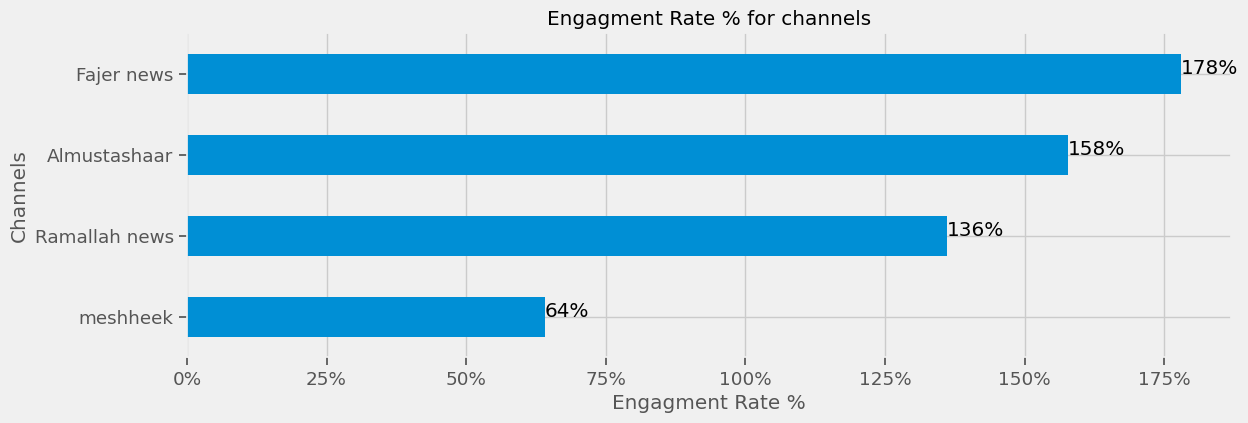

In [ ]:
#Plotting horizontal bar graph for engagement rate
ax=group_engagement_rate.sort_values(by='Total').plot(kind='barh',x='Group',y='Total',legend=False)

ax.set(title='Engagment Rate % for channels',xlabel='Engagment Rate %',ylabel='Channels');


#Change x-axis format to percentage using major formatter
percent_formatter = FuncFormatter(lambda x, _: f'{x / 100:.0f}%')
ax.xaxis.set_major_formatter(FuncFormatter(percent_formatter))

for index, value in enumerate(group_engagement_rate.sort_values(by='Total')['Total']):
    ax.text(value, index, f'{value/ 100:.0f}%', fontsize=12 * 1.2)

plt.show()

- The figure Illustrates that the most engaging channel over the 10-day period,  according to the chosen KPI is 'Fajer News' with an engagement rate of 178% , followed by 'Almustashaar' with an engagement rate of 158%. In the third place is 'Ramallah news' with an engagement rate of 136% while the lowest engagement rate is for 'Meshheek' at 64%.

## Summary Table and insights:

| **Channel Name**        | **Instagram Followers** | **Facebook Followers** | **Telegram Subscribers** | **Total Posts On Telegram** | **Total Interactions On Telegram** | **Engagement Rate (%) On Telegram** |
|-------------------|------------------------|-----------------------|-------------------------|-----------------|------------------------|-------------------------|
| **Fajer News**    | 618K                  | 2M                    | 223K                    | 2566            | 39,726,298             | **178%**                |
| **Ramallah News** | 31.8K                 | 3.2M                  | 264K                    | 1555            | 35,939,450             | **136%**                |
| **Almustashaar**  | 30.9K                 | No Official Page      | 788K                    | 934             | 124,585,767            | **158%**                |
| **Meshheek**      | 39K                   | 9K                    | 476K                    | 363             | 30,572,961             | **64%**                  |



### Insights:

#### High Subscriber Counts:
- **'Almustashaar'** has the highest number of Telegram subscribers (788k) indicating strong interest and potential for engagement.


- **'Meshheek'** also shows a respectable count of 476K subscribers, which is noteworthy compared to its overall engagement rate.

#### Engagement Rates vs. Subscribers:
- Despite having a high number of subscribers, **'Almustashaar'** has a lower engagement rate compared to **'Fajer News'**, which may indicate that subscriber count does not directly correlate with engagement levels.
- **'Meshheek'**, with its lower engagement rate of 64%, may suggest that while it has a high subscriber base, the content may not resonate effectively with its audience.

### Hypotheses:
1. **Content Relevance**: The content shared on Telegram may not fully meet the expectations or interests of the subscribers, particularly for **'Meshheek'**.
2. **Subscriber Engagement**: Channels with a higher number of subscribers may not be effectively converting those subscribers into active participants or engaged audiences.
3. **Platform Strategy**: There may be differences in how each channel utilizes Telegram for communication and interaction, affecting engagement.

### Recommendations:

#### Content Strategy Enhancement:
- **'Almustashaar'** should focus on creating more engaging and interactive content on Telegram to convert subscribers into active participants. Polls, quizzes, and exclusive content can enhance user interaction.

#### Regular Engagement Initiatives:
- **'Meshheek'** should consider implementing regular initiatives, such as live Q&A sessions or community discussions, to foster a more engaged community and improve interaction levels.

#### Analyzing Subscriber Behavior:
- All channels should analyze subscriber behavior, such as message open rates and interactions, to better understand what content resonates with their audience and adjust their strategies accordingly.


# ***Aditional insights***

## Highest daily post count

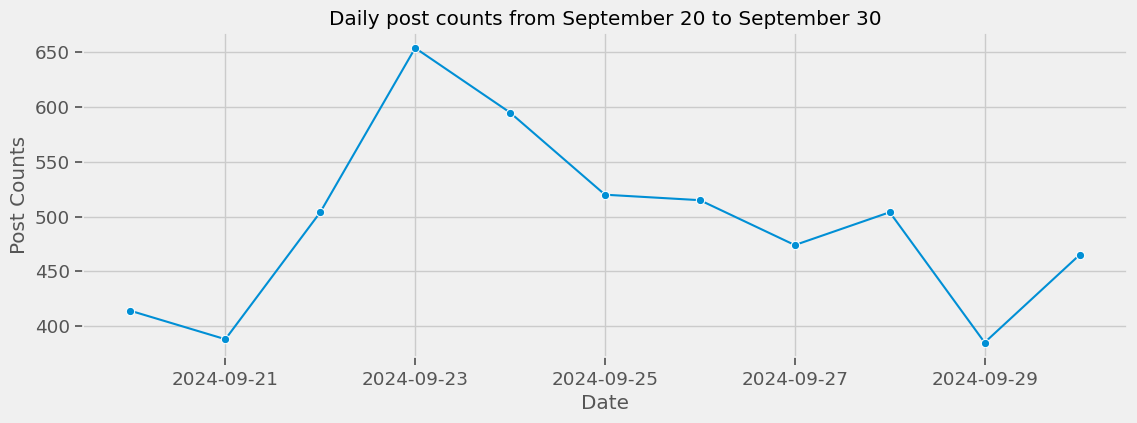

In [35]:
ax=sns.lineplot(data=df.resample('D').size(), marker='o')
ax.set(title='Daily post counts from September 20 to September 30',xlabel='Date',ylabel='Post Counts');

- The figure shows that on September 23, 2024, there were the largest number of posts for the four selected channels,  approximately 650 posts during the 10-days period. After further investigation,  we found that on that day, nearly 500 people were killed in a single day of Israeli strikes in Lebanon, with over 1,600 wounded.

source: https://www.kjzz.org/npr-top-stories/2024-09-23/lebanon-counts-nearly-500-killed-in-a-day-of-israeli-strikes-with-over-1-600-wounded

## Highest reacted post

In [ ]:
df.loc[df['Reactions'].idxmax()]

,2024-09-23 08:47:10
Type,text
Group,meshheek
Author ID,-1001200257707
Content,**عااااااااجل\n\n\nكتائب القسام: تمكن مجاهدونا...
Message ID,50960
Views,86606
Reactions,🫡 998 🔥 218 ❤ 124 👍 31
Shares,42
Media,False
Url,https://t.me/meshheek/50960


- The highest post reaction was on 23-09-2024 on 'Meshheek' with 86K views and 1371 reactions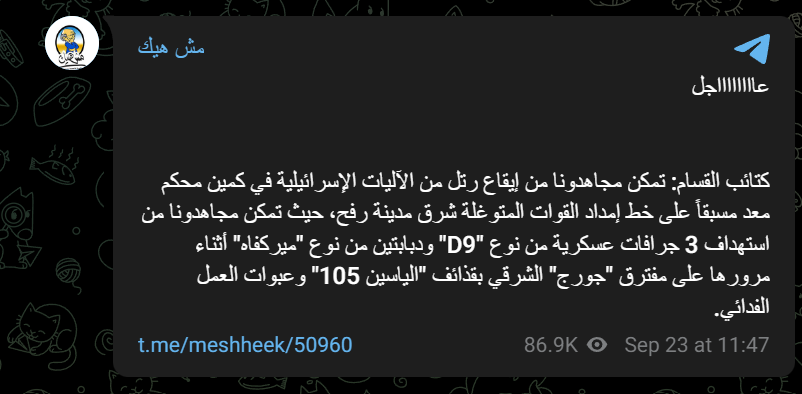